Regularisasi Neural Network
===================

Neural networks terdiri dari lapisan (layers) dan modul (modules) yang beroperasi pada data.
Semua keterangan mengenai bagian penyusunnya dapat dibaca di torch.nn https://pytorch.org/docs/stable/nn.html  
Sebuah neural network adalah sebuah modul yang terdiri dari modul-modul lainnya (layers). Struktur berlapis ini dipakai untuk memudahkan manajemen arsitektur kompleks

Di bagian ini, kita akan menciptakan neural network untuk klasifikasi gambar pada dataset FashionMNIST.




In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
#import torchvision
#from torchvision import datasets, transforms

Memilih Perangkat untuk Training
-----------------------
Kita akan melatih model pada perangkat akselerasi seperti GPU (jika tersedia)
`torch.cuda <https://pytorch.org/docs/stable/notes/cuda.html>`, 
Jika tidak tersedia kita akan melanjutkan dengan menggunakan CPU.



In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Gunakan perangkat {device}')

Gunakan perangkat cpu


Definisikan Kelas
-------------------------
Kita mendefinisikan neural network melalui ``nn.Module``, dan menginisiasi lapisan neural network di ``__init__``. Setiap ``nn.Module`` mengimplementasikan operasi pada input melalui metode ``forward``



In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 3),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        pred_probab = nn.Softmax(dim=1)(logits)
        return pred_probab

Ciptakan sebuah salinan (instance) dari ``NeuralNetwork``, dan pindahkan menuju ``device``, dan tampilkan strukturnya.



In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=3, bias=True)
  )
)


Untuk menggunakan model, kita memasukan inputnya. Ini mengeksekusi ``forward``,
bersama `background operations <https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866>`_.
Jangan memanggil ``model.forward()`` secara langsung!

Memanggil model pada input menghasilkan tensor 10 dimensi dengan nilai prediksi untuk setiap kelas.
Kita mendapatkan peluang prediksi dengan memasukannya melalui salinan (instance) dari modul ``nn.Softmax``.



In [5]:
X = torch.rand(1, 28, 28, device=device)
pred_probab = model(X)
y_pred = pred_probab.argmax(1)
print(f"Prediksi: {y_pred}")

Prediksi: tensor([1])


--------------




Lapisan Model
-------------------------

Mari memecah lapisan-lapisan pada model. Untuk ilustrasi, kita coba ambil sampel minibatch dari 3 gambar dengan ukuran 28x28 dan lihat apa yang terjadi ketika kita memasukannya melalui network.


In [6]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


Perataan (Flatten)
---------------

Kita menginisasi lapisan perataan `nn.Flatten  <https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html>`_
untuk mengubah setiap gambar 2D 28x28 menjadi vektor 784 pixel.



In [7]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


Transformasi Linear
-----------

Lapisan linear `<https://pytorch.org/docs/stable/generated/torch.nn.Linear.html>`_
adalah modul yang mengerjakan transformasi linear pada input dengan menggunakan bobot yang sudah disimpan 




In [8]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


Fungsi Aktivasi
----------
Aktivasi non-linear akan membuat map kompleks dari input menuju output.
Non-linearitas akan membantu neural network belajar beragam variasi fenomena.

Pada contoh kali ini, kita hanya menggunakan `nn.ReLU <https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html>`_ 
diantara lapisan linear, tapi terdapat bentuk aktivasi non-linear lain.



In [9]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.1697,  0.1061,  0.1238, -0.2752, -0.1798,  0.0400,  0.0921, -0.1920,
          0.4513,  0.1011, -0.3212, -0.2636, -0.6815, -0.0232, -0.4241, -0.1300,
         -0.0070,  0.4543, -0.2642,  0.2224],
        [-0.0097, -0.1477,  0.7150, -0.3723, -0.5310, -0.1303,  0.3065, -0.8446,
          0.3970,  0.3051, -0.0155, -0.2332, -0.4334, -0.2065, -0.4922, -0.4397,
          0.1349,  0.3194, -0.5816, -0.1853],
        [-0.2833,  0.1357,  0.4151, -0.6174, -0.5839,  0.1009,  0.2746, -0.6766,
          0.6212,  0.0741, -0.1207, -0.3489, -0.5795, -0.2049, -0.2370, -0.2934,
         -0.0051,  0.8700, -0.5919,  0.1777]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.1697, 0.1061, 0.1238, 0.0000, 0.0000, 0.0400, 0.0921, 0.0000, 0.4513,
         0.1011, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4543,
         0.0000, 0.2224],
        [0.0000, 0.0000, 0.7150, 0.0000, 0.0000, 0.0000, 0.3065, 0.0000, 0.3970,
         0.3051, 0.0000, 0.0000, 0.0000, 0.0000, 0.00

Bentuk Berderet
-------------

`nn.Sequential <https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html>`_ adalah sebuah modul dengan susunan deretan modul. Data diolah melalui semua modul sesuai urutan yang diberikan. 



In [10]:
layer2 = nn.Linear(20, 10)
actf = nn.ReLU()

seq_modules = nn.Sequential(
    flatten,
    layer1,
    actf,
    layer2
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
logits

tensor([[-0.0387,  0.0967, -0.4055,  0.0694, -0.1052, -0.1038,  0.1487,  0.0320,
         -0.1925, -0.1822],
        [ 0.1568,  0.0387, -0.1892,  0.0694,  0.0453, -0.0829,  0.0838,  0.0194,
         -0.3139, -0.1935],
        [ 0.0647,  0.0620, -0.2948,  0.0395, -0.0257, -0.1204,  0.1684,  0.1119,
         -0.2060, -0.2027]], grad_fn=<AddmmBackward0>)

Bentuk Tensor (Alternatif)
-------------

Neural network dapat pula disusun sesuai deretan operasi tensor dari input menuju output



#### Soal
Lanjutkan operasi tensor berikut untuk menghasilkan logits yang sama dengan bentuk sequential

In [11]:
x = flatten(input_image)
x = layer1(x)
x = actf(x)
logits = layer2(x)
logits

tensor([[-0.0387,  0.0967, -0.4055,  0.0694, -0.1052, -0.1038,  0.1487,  0.0320,
         -0.1925, -0.1822],
        [ 0.1568,  0.0387, -0.1892,  0.0694,  0.0453, -0.0829,  0.0838,  0.0194,
         -0.3139, -0.1935],
        [ 0.0647,  0.0620, -0.2948,  0.0395, -0.0257, -0.1204,  0.1684,  0.1119,
         -0.2060, -0.2027]], grad_fn=<AddmmBackward0>)

Softmax
---------------

Lapisan paling akhir pada model kita mengeluarkan `logits` - nilai diantara [-\infty, \infty] - sebagai input dari modul
`nn.Softmax <https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html>`_. Hasilnya adalah nilai diantara
[0, 1] sebagai representasi peluang prediksi untuk setiap kelas. parameter ``dim`` mengindikasikan pilihan dimensi mana yang jumlahnya harus 1.



In [12]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

tensor([[0.1018, 0.1165, 0.0705, 0.1134, 0.0952, 0.0953, 0.1227, 0.1092, 0.0872,
         0.0882],
        [0.1201, 0.1068, 0.0850, 0.1101, 0.1075, 0.0945, 0.1117, 0.1047, 0.0750,
         0.0846],
        [0.1099, 0.1096, 0.0767, 0.1071, 0.1004, 0.0913, 0.1219, 0.1152, 0.0838,
         0.0841]], grad_fn=<SoftmaxBackward0>)

Dropout
--------

Regularisasi dropout dapat diimplementasi dengan menambah lapisan dropout pada bobot yang memerlukannya

In [13]:
m = nn.Dropout(p=0.2)
output = m(input_image)
output[0]

tensor([[0.0000, 0.0000, 0.9484, 0.0000, 0.6332, 1.0768, 0.0744, 0.8345, 0.2476,
         0.1024, 1.2327, 0.6415, 0.2819, 0.7403, 1.2362, 0.9083, 0.5358, 0.0000,
         0.1323, 0.0000, 1.0722, 0.1814, 0.8420, 0.7757, 0.0000, 1.1975, 0.8974,
         0.0000],
        [1.2098, 0.4696, 0.0000, 0.9036, 0.0000, 1.2271, 1.1877, 1.0228, 0.0307,
         0.7914, 0.1858, 0.0000, 0.1783, 0.3027, 0.0964, 0.6793, 0.0000, 0.4407,
         0.0000, 0.8999, 0.1926, 0.4496, 0.0000, 0.0000, 0.0000, 0.0982, 0.4198,
         1.0683],
        [0.9592, 0.9619, 0.0000, 0.5762, 0.5279, 0.6074, 0.5544, 0.8796, 1.0165,
         0.9002, 0.3919, 0.1935, 0.0000, 1.1020, 0.2986, 0.0000, 0.4470, 0.9719,
         0.0075, 1.1150, 0.3184, 0.3899, 0.1475, 0.9139, 1.2101, 0.1627, 0.3868,
         0.7079],
        [0.4487, 0.4563, 0.3582, 0.7739, 0.6885, 0.0000, 0.7130, 0.6431, 0.0000,
         0.7899, 0.5576, 0.1256, 0.7449, 0.0000, 0.7458, 0.7652, 1.1401, 0.8837,
         0.4103, 0.0000, 0.6466, 0.4575, 0.3028, 1.0443

In [14]:
m = nn.Dropout(p=0.5)
output = m(x)
output[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3044, 0.9402, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.4998], grad_fn=<SelectBackward0>)

Normalisasi Batch
---------

Normalisasi batch

In [15]:
m = nn.BatchNorm1d(x.shape[1])
output = m(x)
output[0]

tensor([ 1.3110, -0.7021,  1.3761,  0.0000,  0.0000,  0.0747,  1.4072,  0.0000,
         1.3997, -0.0171,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.8343, -1.1372,  0.0000,  0.9096], grad_fn=<SelectBackward0>)

In [16]:
m = nn.BatchNorm1d(logits.shape[1])
output = m(logits)
output[0]

tensor([-1.2468,  1.2861, -1.2334,  0.6909, -1.2454, -0.0908,  0.4154, -0.5469,
         0.8262,  1.1819], grad_fn=<SelectBackward0>)

Parameter Model
-------------------------
Banyak lapisan dalam neural network adalah parameter, yaitu memiliki bobot yang akan dioptimalisasi selama training
``nn.Module`` otomatis melacak semua isi dalam objek model, dan membuat semua parameter terakses menggunakan metode ``parameters()`` atau ``named_parameters()``.

Di contoh ini, kita iterasi setiap parameter, lalu mencetak ukurannya dan melihat nilainya.




In [17]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=3, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0077,  0.0086, -0.0194,  ..., -0.0323,  0.0110, -0.0199],
        [ 0.0051,  0.0096,  0.0271,  ...,  0.0196, -0.0031,  0.0201]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0237, -0.0108], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0111, -0.0242,  0.0073,  ...,  0.0102, -0.0350,  0.0363],
        [-0.0284,  0.0179, -0.0415,  ..., -0.0106, -0.0209,  0.0250]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias |

--------------




#### Soal

Buatlah kelas neural network baru yang sama persis dengan kelas sebelumnya namun menggunakan bentuk tensor

In [18]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28*28, 512)
        self.layer2 = nn.Linear(512, 512)
        self.layer3 = nn.Linear(512, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        logits = self.layer3(x)
        prob = nn.Softmax(dim=1)(logits)
        return prob
    
NNet = NeuralNetwork().to(device)
print(NNet)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=512, bias=True)
  (layer3): Linear(in_features=512, out_features=3, bias=True)
  (relu): ReLU()
)


#### Soal

Buatlah kelas neural network baru (dengan nama NeuralNetworkReg) yang sama persis dengan kelas sebelumnya namun ditambah dengan memakai regularisasi dropout di setiap hidden layers, dan inisiasi xavier/He untuk setiap lapisan bobot

In [19]:
class NeuralNetworkReg(nn.Module):
    def __init__(self):
        super(NeuralNetworkReg, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28*28, 512)
        #torch.nn.init.xavier_normal_(self.layer1.weight)
        torch.nn.init.kaiming_uniform_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        self.layer2 = nn.Linear(512, 512)
        #torch.nn.init.xavier_normal_(self.layer2.weight)
        torch.nn.init.kaiming_uniform_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        self.layer3 = nn.Linear(512, 3)
        #torch.nn.init.xavier_normal_(self.layer3.weight)
        torch.nn.init.kaiming_uniform_(self.layer3.weight, mode='fan_in', nonlinearity='relu')
        self.relu = nn.ReLU()
        self.mask = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        x = self.mask(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.mask(x)
        x = self.relu(x)
        logits = self.layer3(x)
        prob = nn.Softmax(dim=1)(logits)
        return prob
    
NNetReg = NeuralNetworkReg().to(device)
print(NNetReg)

NeuralNetworkReg(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=512, bias=True)
  (layer3): Linear(in_features=512, out_features=3, bias=True)
  (relu): ReLU()
  (mask): Dropout(p=0.5, inplace=False)
)


Buatlah data input dan label

In [20]:
input_image = torch.rand(100,28,28)
label_image = torch.randint(0, 3, (100,))
print(input_image.size())
print(label_image.size())


torch.Size([100, 28, 28])
torch.Size([100])


Hitung prediksi model dan bandingkan dengan label

In [21]:
X = input_image.to(device)
y = label_image.to(device)
prob = NNet(X)
y_pred = prob.argmax(1)
print(f"Prediksi: {y_pred}")
print(f"Label: {y}")
print(f"akurasi: {torch.sum(y_pred == y)/len(y_pred)}")

Prediksi: tensor([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0,
        1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0])
Label: tensor([2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2,
        2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1,
        2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2,
        0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2,
        1, 1, 0, 2])
akurasi: 0.3400000035762787


Hitunglah loss function dengan menggunakan cross entropy

In [22]:
criterion = nn.CrossEntropyLoss()
loss = criterion(prob, y)
print(loss)

tensor(1.0988, grad_fn=<NllLossBackward0>)


Penalti Norm 
----------
Regularisasi penalti dapat diimplementasi secara manual dengan modifikasi loss function atau secara otomatis dengan menggunakan weight decay

In [23]:
l2_lambda = 0.001
l2_norm = sum(p.pow(2.0).sum() for p in NNet.parameters())
loss_reg = loss + l2_lambda * l2_norm

In [24]:
sgd = torch.optim.SGD(NNet.parameters(), lr=0.1, weight_decay=l2_lambda)


Gunakan Backpropagation dan gradient descent untuk mengubah bobot dengan memakai regularisasi l2

In [25]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(NNet.parameters(), lr=0.1, weight_decay=l2_lambda)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
prob = NNet(X)
loss = criterion(prob, y)
loss.backward()     #backprop
optimizer.step()    #update
print(loss)

tensor(1.0988, grad_fn=<NllLossBackward0>)


Cara gradient descent manual

In [29]:
learning_rate = 0.1
for p in NNet.parameters():
    p.data.sub_(p.grad.data * learning_rate)

Hitung kembali akurasi

In [30]:
prob = NNet(X)
y_pred = prob.argmax(1)
print(f"Prediksi: {y_pred}")
print(f"Label: {y}")
print(f"akurasi: {torch.sum(y_pred == y)/len(y_pred)}")

Prediksi: tensor([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2,
        0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2])
Label: tensor([2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2,
        2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1,
        2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2,
        0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2,
        1, 1, 0, 2])
akurasi: 0.5199999809265137


#### Soal
iterasi sampe 100 kali dan plot loss function terhadap iterasi, lalu hitung akurasi

tensor(0.9794, grad_fn=<NllLossBackward0>)
tensor(0.9850, grad_fn=<NllLossBackward0>)
tensor(0.9767, grad_fn=<NllLossBackward0>)
tensor(0.9806, grad_fn=<NllLossBackward0>)
tensor(0.9712, grad_fn=<NllLossBackward0>)
tensor(0.9754, grad_fn=<NllLossBackward0>)
tensor(0.9676, grad_fn=<NllLossBackward0>)
tensor(0.9717, grad_fn=<NllLossBackward0>)
tensor(0.9636, grad_fn=<NllLossBackward0>)
tensor(0.9687, grad_fn=<NllLossBackward0>)
tensor(0.9606, grad_fn=<NllLossBackward0>)
tensor(0.9661, grad_fn=<NllLossBackward0>)
tensor(0.9577, grad_fn=<NllLossBackward0>)
tensor(0.9638, grad_fn=<NllLossBackward0>)
tensor(0.9543, grad_fn=<NllLossBackward0>)
tensor(0.9606, grad_fn=<NllLossBackward0>)
tensor(0.9511, grad_fn=<NllLossBackward0>)
tensor(0.9576, grad_fn=<NllLossBackward0>)
tensor(0.9475, grad_fn=<NllLossBackward0>)
tensor(0.9548, grad_fn=<NllLossBackward0>)
tensor(0.9447, grad_fn=<NllLossBackward0>)
tensor(0.9515, grad_fn=<NllLossBackward0>)
tensor(0.9405, grad_fn=<NllLossBackward0>)
tensor(0.94

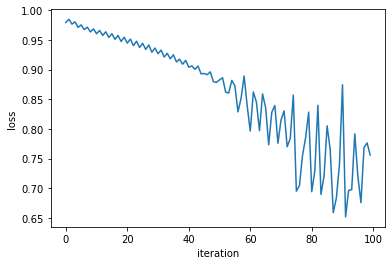

Prediksi: tensor([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0])
Label: tensor([2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2,
        2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1,
        2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2,
        0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2,
        1, 1, 0, 2])
akurasi: 0.6399999856948853


In [31]:
import matplotlib.pyplot as plt
prob = NNet(X)
optimizer = optim.SGD(NNet.parameters(), lr=0.1, weight_decay=0)
Loss = []
for i in range(100):
    optimizer.zero_grad()   # zero the gradient buffers
    prob = NNet(X)       # feedforward
    loss = criterion(prob, y)
    loss.backward()     #backprop
    optimizer.step()    #update
    print(loss)
    Loss.append(float(loss.detach().numpy()))
    
plt.plot(Loss)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()
plt.close()

prob = NNet(X)
y_pred = prob.argmax(1)
print(f"Prediksi: {y_pred}")
print(f"Label: {y}")
print(f"akurasi: {torch.sum(y_pred == y)/len(y_pred)}")

Lakukan hal yang sama untuk Neural Network dengan regularisasi dropout dan L2

tensor(0.8515, grad_fn=<NllLossBackward0>)
tensor(0.9123, grad_fn=<NllLossBackward0>)
tensor(0.8547, grad_fn=<NllLossBackward0>)
tensor(0.7890, grad_fn=<NllLossBackward0>)
tensor(0.8176, grad_fn=<NllLossBackward0>)
tensor(0.7802, grad_fn=<NllLossBackward0>)
tensor(0.8424, grad_fn=<NllLossBackward0>)
tensor(0.8774, grad_fn=<NllLossBackward0>)
tensor(0.8404, grad_fn=<NllLossBackward0>)
tensor(0.8215, grad_fn=<NllLossBackward0>)
tensor(0.8006, grad_fn=<NllLossBackward0>)
tensor(0.8073, grad_fn=<NllLossBackward0>)
tensor(0.8268, grad_fn=<NllLossBackward0>)
tensor(0.8463, grad_fn=<NllLossBackward0>)
tensor(0.8459, grad_fn=<NllLossBackward0>)
tensor(0.8452, grad_fn=<NllLossBackward0>)
tensor(0.8191, grad_fn=<NllLossBackward0>)
tensor(0.7937, grad_fn=<NllLossBackward0>)
tensor(0.7796, grad_fn=<NllLossBackward0>)
tensor(0.7459, grad_fn=<NllLossBackward0>)
tensor(0.7487, grad_fn=<NllLossBackward0>)
tensor(0.7896, grad_fn=<NllLossBackward0>)
tensor(0.8145, grad_fn=<NllLossBackward0>)
tensor(0.79

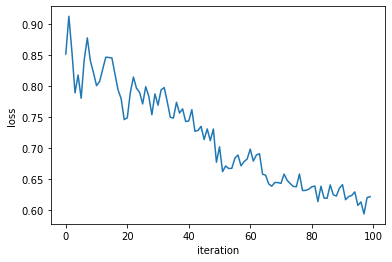

Prediksi: tensor([2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2,
        2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1,
        2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2,
        0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2,
        1, 1, 0, 1])
Label: tensor([2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2,
        2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1,
        2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2,
        0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2,
        1, 1, 0, 2])
akurasi: 0.9800000190734863


In [32]:
l2_lambda=0.01
prob = NNetReg(X)
optimizer = optim.SGD(NNetReg.parameters(), lr=0.1, weight_decay=l2_lambda)
Loss = []
for i in range(100):
    optimizer.zero_grad()   # zero the gradient buffers
    prob = NNetReg(X)       # feedforward
    loss = criterion(prob, y)
    loss.backward()     #backprop
    optimizer.step()    #update
    print(loss)
    Loss.append(float(loss.detach().numpy()))
    
plt.plot(Loss)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()
plt.close()

prob = NNetReg(X)
y_pred = prob.argmax(1)
print(f"Prediksi: {y_pred}")
print(f"Label: {y}")
print(f"akurasi: {torch.sum(y_pred == y)/len(y_pred)}")